# Research of advertisements for the sale of apartments

Based on data from the Yandex.Real Estate service, the market value of different types of real estate and typical parameters of apartments were determined, depending on the distance from the center. Data preprocessing has been carried out. New data added. Constructed histograms, boxplots, and scatter plots.

### Open the data file and review the general information.

In [1]:
import pandas as pd # importing the pandas library
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # считываю файл данных
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
data.describe() #  data description


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [2]:
data.head() # display the first five rows of the table

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


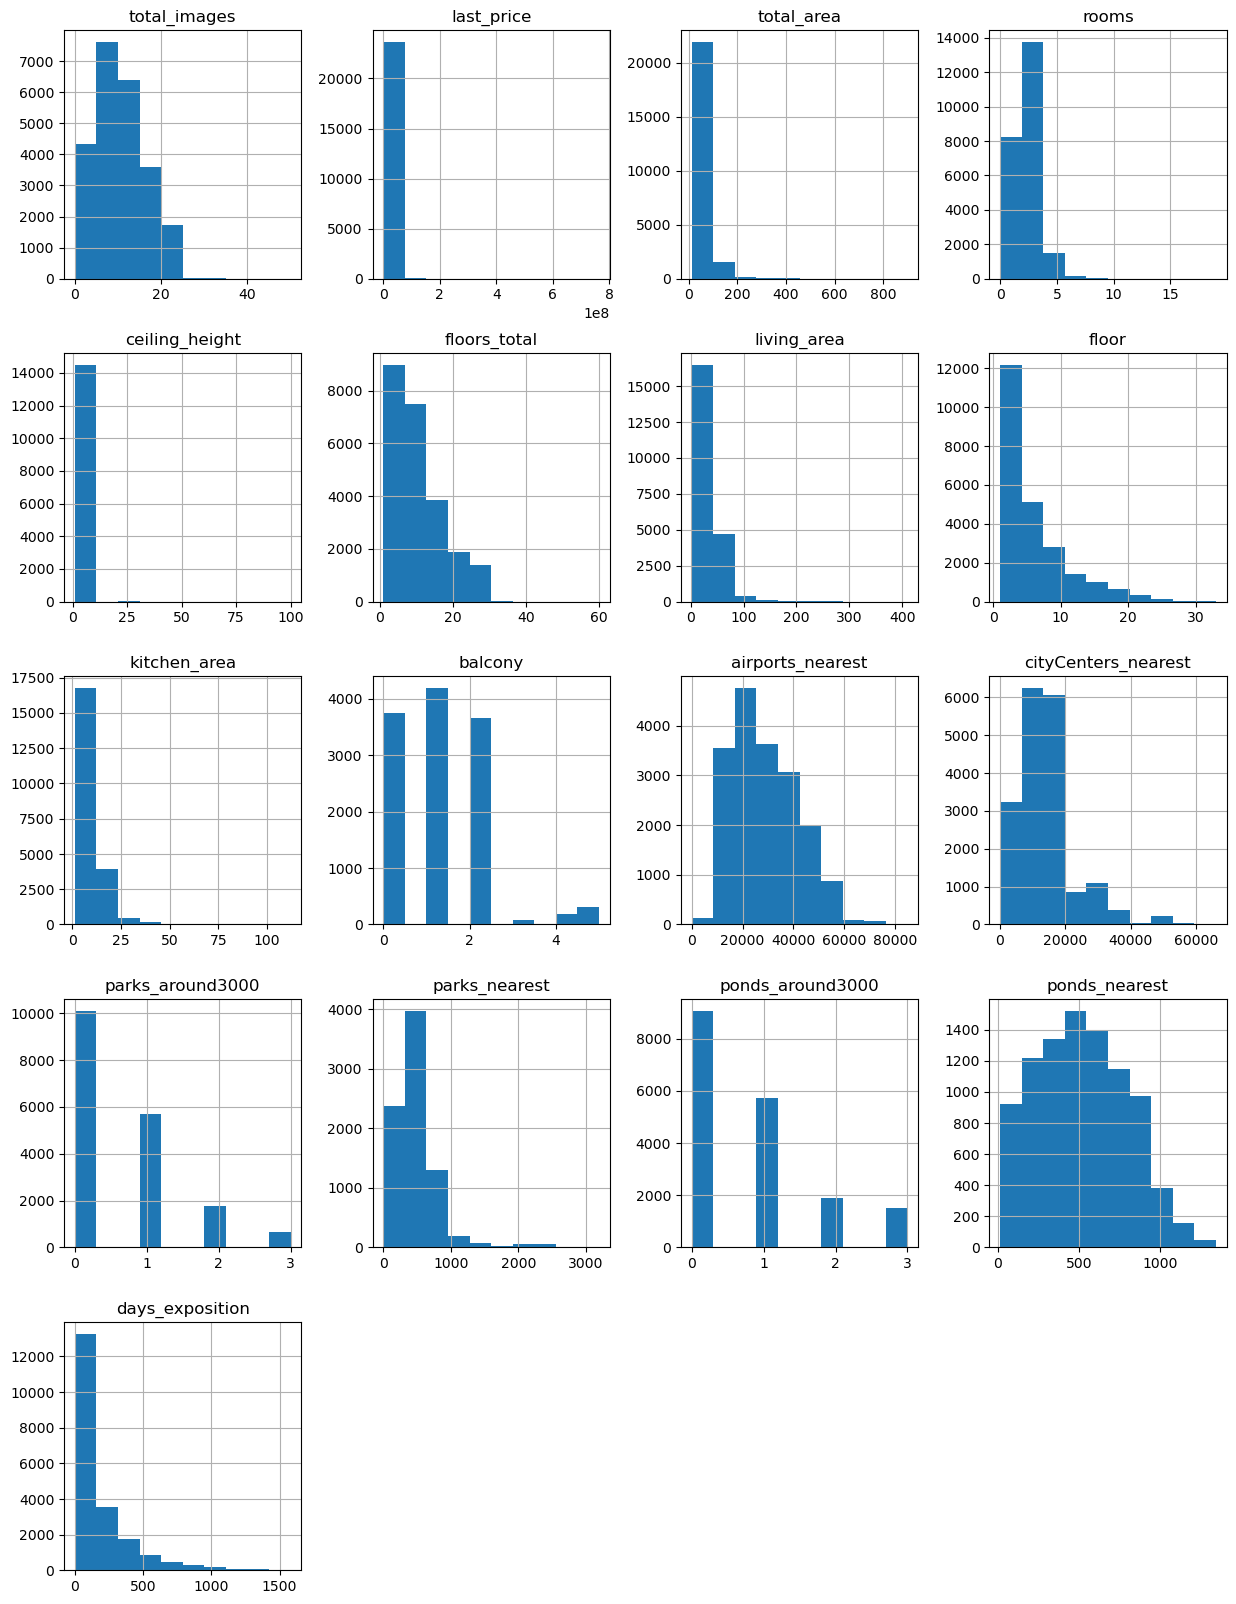

In [3]:
import matplotlib.pyplot as plt
data.hist(figsize=(15, 20)) # we build diagrams for all columns of the table with numerical indicators
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

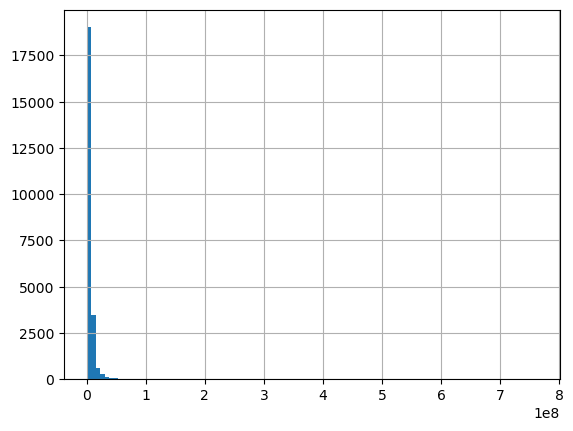

In [4]:
# read the column with prices into a separate variable because this diagram looks strange
last_price_norm=data['last_price'] 
last_price_norm.hist(bins=100) # build a diagram for 100 baskets
plt.show

There is a clear problem in the last price column. The main number of values are below the minimum.

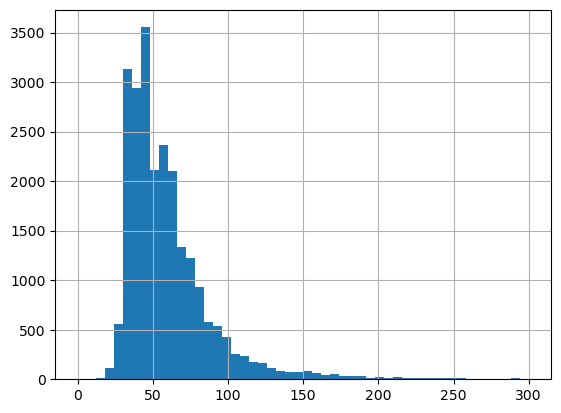

In [5]:
# specifying the range and number of baskets for the total area diagram
data['total_area'].hist(bins=50, range=(0,300)) 
plt.show()

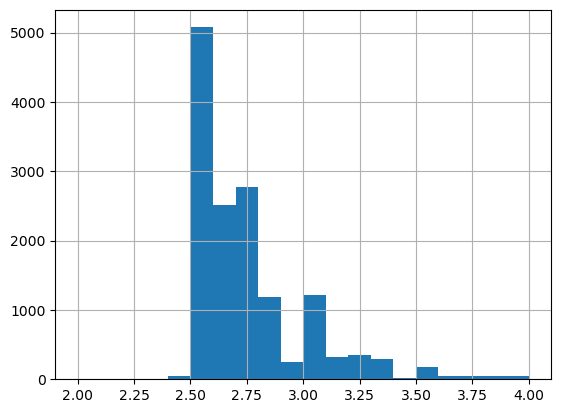

In [6]:
# specify the range and number of baskets for the ceiling height chart
data['ceiling_height'].hist(bins=20, range=(2,4)) 
plt.show()


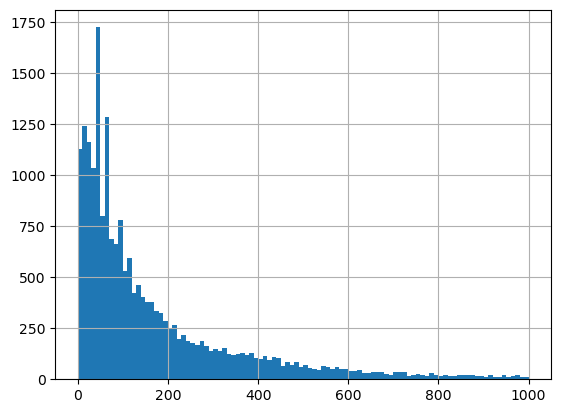

In [7]:
# specify the range and number of baskets for the sales duration diagram
data['days_exposition'].hist(bins=100, range=(0,1000)) 
plt.show()

<div class="alert alert-info"> <b>Comments</b> The histogram of ad placement periods has a number of outliers, with the outlier on days 42 and 60 being several times higher than the background.

In general, the presented data have adequate histograms. The histograms of the cost of objects and the duration of ad placement raise suspicions. </div>


### Data preprocessing

In [8]:
data.info() #  display general information about the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [10]:
# There is a very large proportion of gaps in the apartments column. We study what values are present in the graph
data['is_apartment'].value_counts() 

False    2725
True       50
Name: is_apartment, dtype: int64

In [11]:
#replace the missing ones with negations,
#because If they were selling apartments, they would definitely indicate this information
data['is_apartment'] = data['is_apartment'].fillna(False) 
data['is_apartment'].value_counts() # check the values in the column after replacement

False    23649
True        50
Name: is_apartment, dtype: int64

<div class="alert alert-info"> <b>Comments:</b> From the table of gaps in percentage, it became clearly visible that there was too large a share of gaps in the apartments column. He hypothesized that apartment sellers would certainly indicate this information. Accordingly, the missing values are due to the fact that sellers of ordinary real estate simply ignore this column. Accordingly, I replaced the gaps with negations. All advertisements contain photographs, cost, total area, start date of sale, number of rooms, floor, whether it is a studio and whether there is an open plan. The lack of meaning in the names of settlements raises a question. For selling real estate, this is one of the key parameters.</div>

In [12]:
data.isnull().sum() # checking for gaps in the table

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
data['balcony'] = data['balcony'].fillna(0) # fill in the gaps in the balconies column with zeros

In [14]:
data.isnull().sum() # checking gaps after changes

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Noteworthy is the close number of gaps in the columns of the park within a radius of 3 km, ponds within a radius of 3 km, distance to the center. It is fair to assume that they are due to the lack of parks within a 3 km radius,
ponds and the city center. It is logical to assume that if there are no parks within a radius of 3 km, then accordingly there are no ponds and most likely this is not the city center. Blank values for parks and ponds can be replaced with 0.


In [15]:
# number of lines that are missing at the same time information about parks, ponds, distances 
#to the airport and city center
len(data.loc[(data['parks_around3000'].isnull()) & (data['ponds_around3000'].isnull())&
   (data['airports_nearest'].isnull())& (data['cityCenters_nearest'].isnull()), 'ponds_around3000']
)

5518

In [16]:
#create a slice by rows that lack information about parks
parks=data.loc[data['parks_around3000'].isnull()] 
#display information about parks, ponds, distances to the airport and city center, 
#as well as the name of the locality
parks[['parks_around3000', 'ponds_around3000', 'airports_nearest','cityCenters_nearest', 'locality_name']].head(20)


,parks_around3000,ponds_around3000,airports_nearest,cityCenters_nearest,locality_name
5,NaN,NaN,NaN,NaN,городской посёлок Янино-1
8,NaN,NaN,NaN,NaN,посёлок Мурино
12,NaN,NaN,NaN,NaN,Сертолово
22,NaN,NaN,NaN,NaN,деревня Кудрово
30,NaN,NaN,NaN,NaN,Коммунар
37,NaN,NaN,NaN,NaN,поселок городского типа Красный Бор
38,NaN,NaN,NaN,NaN,посёлок Мурино
47,NaN,NaN,NaN,NaN,Гатчина
60,NaN,NaN,NaN,NaN,посёлок Мурино
62,NaN,NaN,NaN,NaN,Сертолово


The hypothesis was confirmed. The missing values in the columns for the nearest parks, ponds, distance to airports, and the center are fully consistent. Most of them are far from the city center.

In [17]:
# We replaced the missing data in the columns for the number of parks and ponds with zero, 
#because this is the most likely value.
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].fillna(0)

In [18]:
data[['parks_around3000', 'ponds_around3000']].isnull().sum() # check

parks_around3000    0
ponds_around3000    0
dtype: int64

In [19]:
# Estimation of the price column values since the histogram showed an outlier at the zero value
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

The mean is clearly below the median. Also, the minimum value is almost three orders of magnitude less than the median.

Probably in the problems column.

Hypothesis: Many prices are in thousands.

<function matplotlib.pyplot.show(close=None, block=None)>

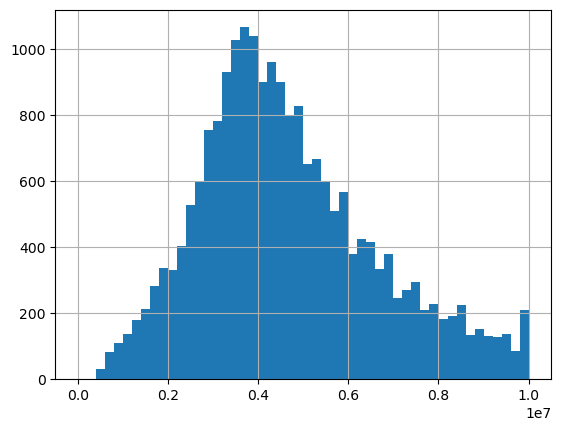

In [20]:
data['last_price'].hist(bins=50, range=(0,10000000)) # price histogram in the most probable range
plt.show

In [21]:
len(data[data['last_price']<500000]) # number of values below unlikely prices

14

In [22]:
len(data[data['last_price']>50000000]) # the number of price values is higher than probable for the majority

131

<function matplotlib.pyplot.show(close=None, block=None)>

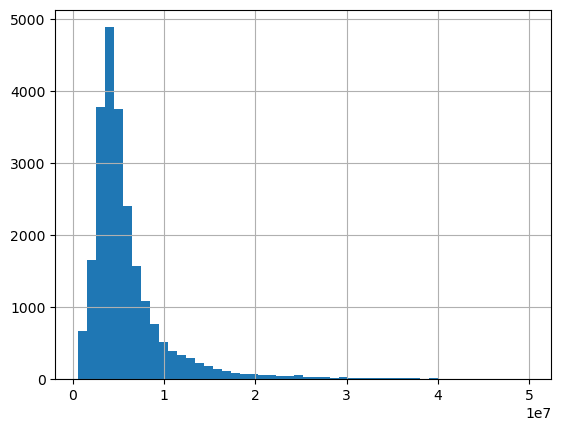

In [23]:
data = data.query('50000000>last_price>500000') # reassigning values without rows containing probable outliers
data['last_price'].hist(bins=50) # checking the distribution of updated values
plt.show

<AxesSubplot:>

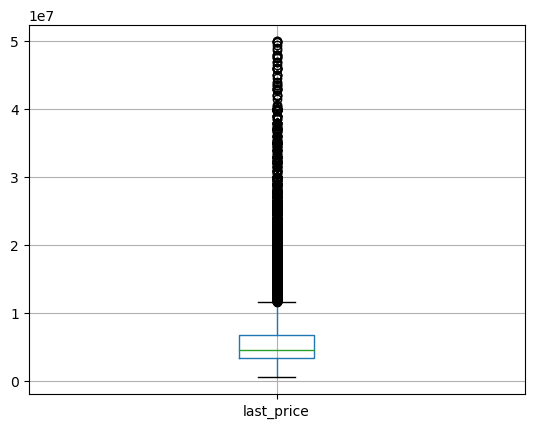

In [24]:
data.boxplot(column = 'last_price') # range diagram

In [25]:
data['last_price'].describe() # column statistics

count    2.354300e+04
mean     5.990678e+06
std      4.917805e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.996890e+07
Name: last_price, dtype: float64

In [26]:
data['last_price'].isna().sum() # checking for gaps

0

<div class="alert alert-info"> <b>Comment:</b> The data has become more homogeneous. The histogram is more correct. Now they can be used. </div>

In [27]:
data.info() #general information about the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23543 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23543 non-null  int64  
 1   last_price            23543 non-null  float64
 2   total_area            23543 non-null  float64
 3   first_day_exposition  23543 non-null  object 
 4   rooms                 23543 non-null  int64  
 5   ceiling_height        14410 non-null  float64
 6   floors_total          23457 non-null  float64
 7   living_area           21663 non-null  float64
 8   floor                 23543 non-null  int64  
 9   is_apartment          23543 non-null  bool   
 10  studio                23543 non-null  bool   
 11  open_plan             23543 non-null  bool   
 12  kitchen_area          21291 non-null  float64
 13  balcony               23543 non-null  float64
 14  locality_name         23494 non-null  object 
 15  airports_nearest   

In [28]:
data['first_day_exposition'] # ad day column

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
4        2018-06-19T00:00:00
5        2018-09-10T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23543, dtype: object

The data type to a date and time should correct

In [29]:
# changing date column format from string to datetime format
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['first_day_exposition'].head() # output checking

0   2019-03-07
1   2018-12-04
2   2015-08-20
4   2018-06-19
5   2018-09-10
Name: first_day_exposition, dtype: datetime64[ns]

In [30]:
data['first_day_exposition'].isna().sum() # checking for gaps in the ad submission date column

0

In [31]:
data['locality_name'] = data['locality_name'].str.lower() # convert all names of settlements to lower case
#sort in descending order, counting the number of ads and display the first 50
data['locality_name'].value_counts().head(50)

санкт-петербург                            15582
посёлок мурино                               522
посёлок шушары                               440
всеволожск                                   398
пушкин                                       369
колпино                                      338
посёлок парголово                            327
гатчина                                      307
деревня кудрово                              299
выборг                                       237
петергоф                                     201
сестрорецк                                   183
красное село                                 178
кудрово                                      173
деревня новое девяткино                      144
сертолово                                    142
ломоносов                                    133
кириши                                       125
волхов                                       111
сланцы                                       107
тосно               

In [32]:
len(data['locality_name'].unique()) # number of settlements for which data is available

362

In [33]:
dublicates = pd.DataFrame(columns=['name', 'dublicates']) # create an empty dataframe
local_name = data['locality_name']#  create a working variable to simplify the work
local_name = local_name.astype(str)# the loop was complaining about floats so it converted everything to strings
for name in local_name.unique():#   started a loop on unique values
        for i in local_name:  #  cycle through the value of the working variable
            if (name in i.split()) and (name!=i): # select lines that contain unique values as a component
                dublicates.loc[len(dublicates)] = [name, i]  # add to our dataframe
        
dublicates.value_counts()   #  look at the values and number of mentions

name        dublicates     
мурино      посёлок мурино     522
кудрово     деревня кудрово    299
мурино      поселок мурино      34
любань      поселок любань       3
никольское  село никольское      1
dtype: int64

In [34]:
# rename the columns in the previously obtained table
local_name = local_name.replace({'посёлок мурино' : 'мурино', 'деревня кудрово':'кудрово', 
                                'поселок мурино':'мурино', 'поселок любань': 'любань', 'село никольское':'никольское'
                                })
local_name.value_counts() # sort and display

санкт-петербург         15582
мурино                    590
кудрово                   472
посёлок шушары            440
всеволожск                398
                        ...  
поселок гаврилово           1
деревня мануйлово           1
поселок коммунары           1
деревня пчева               1
посёлок дзержинского        1
Name: locality_name, Length: 357, dtype: int64

The number of data for Murino and Kudrovo has increased. At the same time, Kudrovo became 3rd in popularity

In [35]:
data['locality_name_new'] = local_name #  a new column with the correct names of settlements in my opinion
data.head() # first 5 lines

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_new
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,санкт-петербург
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,посёлок шушары
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,санкт-петербург
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,0.0,городской посёлок янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,городской посёлок янино-1


In [36]:
data[data['balcony']%1 != 0]['balcony'].count() # checked the number of lines with a fraction

0

In [37]:
data['balcony'] =  data['balcony'].round() # rounded to a whole value in the balconies column
data['balcony'] =  data['balcony'].astype(int) # changed the data type in the column
data['balcony'].head() # checked


0    0
1    2
2    0
4    0
5    0
Name: balcony, dtype: int64

<div class="alert alert-info"> <b>Comment:</b> Changed the balcony column type to int. I first checked for the presence of fractional values in the available data. But just in case, I smoked it.</div>

In [38]:
#checking for unrealistically small values in ceiling heights
data.query('ceiling_height < 1')['ceiling_height'].count()

0

In [39]:
large_ceiling = data.query('ceiling_height > 20')['ceiling_height'] # unrealistically high ceilings
large_ceiling.count() # counting their number

22

In [40]:
# since there are not many of them, we display a sorted list of unrealistically large values
large_ceiling.value_counts() 

27.0     8
25.0     7
32.0     2
24.0     1
26.0     1
22.6     1
27.5     1
100.0    1
Name: ceiling_height, dtype: int64

In [41]:
# for ceiling values more than 20 m, divide the value by 10
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20, data['ceiling_height']/10)
data.query('ceiling_height > 20')['ceiling_height'].count() # check the result of the replacement

0

<div class="alert alert-info"> <b>Comment:</b> I checked the ceiling height column for emissions. There are no unrealistically small values. There are high ones. The bulk of these values are from 25 to 27 m. Here, there is clearly an error of an order of magnitude compared to standard high values. There is a value of 100, which even with an error of 10 times looks large. But a height of 1 m is also not realistic. So this value was also reduced by 1. In general, such values can be deleted.

p.s. Fortunately, there are no 1.5 balconies in reality. But the main thing is that this thought does not enter the minds of developers. Otherwise, the Euro-dvushka has already come into common use. </div>

In [42]:
data.duplicated().sum() # checking for obvious duplicates

0

### Adding new columns to the table

In [43]:
data['price_meter'] = data['last_price']/data['total_area'] # Creating a column with price per square meter
data[['last_price', 'total_area','price_meter']].head()# check

,last_price,total_area,price_meter
0,13000000.0,108.0,120370.370370
1,3350000.0,40.4,82920.792079
2,5196000.0,56.0,92785.714286
4,10000000.0,100.0,100000.000000
5,2890000.0,30.4,95065.789474


In [44]:
# publication day
data['day_exp'] = data['first_day_exposition'].dt.weekday # added a column with the number of the day of the week
data['day_exp'].head() # check

0    3
1    1
2    3
4    1
5    0
Name: day_exp, dtype: int64

In [45]:
#  month of publication
data['month'] = data['first_day_exposition'].dt.month # added a column with the month of publication
data['month'].head # check

<bound method NDFrame.head of 0         3
1        12
2         8
4         6
5         9
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23543, dtype: int64>

In [46]:
data['year'] = data['first_day_exposition'].dt.year # added a column with the year of publication
data['year'].head # checked

<bound method NDFrame.head of 0        2019
1        2018
2        2015
4        2018
5        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23543, dtype: int64>

In [47]:
data['floor'].isna().sum() # checking for gaps in the floor column

0

In [48]:
data['floors_total'].isna().sum() # checking for gaps in the total number of floors column

86

There are gaps in the columns for the number of floors in the house. There is nowhere to get the missing information. However, there are few missing values. Therefore, rows with gaps in this column can be deleted.

In [49]:
data = data.dropna(subset=['floors_total']) # Removing lines with gaps
data['floors_total'].isna().sum() # checking for gaps

0

In [50]:
# apartment floor type (values - “first”, “last”, “other”) 
# Function for categorization by number of floors
def floor_type(row):
    floor = row['floor'] # floor
    floor_total = row['floors_total']# number of floors of the building
    if floor == 1:# ccondition for 1st floor
        return 'первый'#category output
    if floor == floor_total:#condition for last floor
        return 'последний'#category output
    return 'другой'#category output
    

data['floors_total'] = data['floors_total'].astype(int) # convert to int to avoid fractional values for the floor
data['floor_type'] = data.apply(floor_type, axis = 1)  # apply the categorization function
data['floor_type'].value_counts()  # checking


другой       17263
последний     3292
первый        2902
Name: floor_type, dtype: int64

In [51]:
data.info() # general information about the table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23457 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23457 non-null  int64         
 1   last_price            23457 non-null  float64       
 2   total_area            23457 non-null  float64       
 3   first_day_exposition  23457 non-null  datetime64[ns]
 4   rooms                 23457 non-null  int64         
 5   ceiling_height        14401 non-null  float64       
 6   floors_total          23457 non-null  int64         
 7   living_area           21610 non-null  float64       
 8   floor                 23457 non-null  int64         
 9   is_apartment          23457 non-null  bool          
 10  studio                23457 non-null  bool          
 11  open_plan             23457 non-null  bool          
 12  kitchen_area          21252 non-null  float64       
 13  balcony         

In [52]:
data[['floor', 'floors_total']].head # values in the floor and total number of floors columns

<bound method NDFrame.head of        floor  floors_total
0          8            16
1          1            11
2          4             5
4         13            14
5          5            12
...      ...           ...
23694      3             5
23695      4             5
23696      1             3
23697     12            17
23698      1             5

[23457 rows x 2 columns]>

In [53]:
# distance to center in km
# create a new column and convert the values from m to km
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round() 
data['cityCenters_nearest_km'].value_counts().head() #  checking

12.0    1600
15.0    1561
13.0    1451
14.0    1276
16.0    1265
Name: cityCenters_nearest_km, dtype: int64

### Exploratory data analysis

In [54]:
# Studying data on the total area of apartments
data['total_area'].describe() # display statistical parameters of the total area

count    23457.000000
mean        59.199505
std         30.892568
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        494.100000
Name: total_area, dtype: float64

The median value is below average, which indicates the predominance of apartments with small areas. In general, the values of the minimum and maximum area are close to real ones.

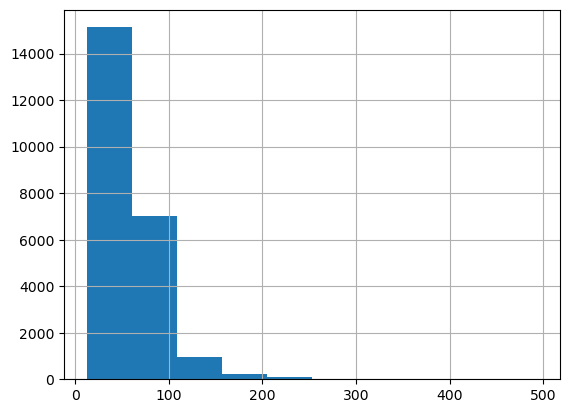

In [55]:
pd.Series(data['total_area']).hist() # histogram for total area
plt.show()

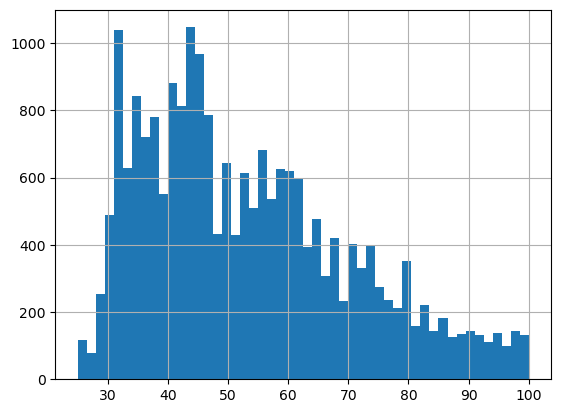

In [56]:
# we specify the most typical range of values and the number of baskets
pd.Series(data['total_area']).hist(bins = 50, range=(25, 100)) 
plt.show()

<div class="alert alert-info"> <b>Comments:</b> The most popular areas are 31 and 43 sq. m.</div>

<div class="alert alert-info"> <b>Comments:</b>The distribution of the total area of apartments is characterized by the Poison distribution. Probably the distribution is not normal because real estate is quite an expensive product. As a result, the area of apartments tends to a minimum. Most apartments have an area of 30-60 square meters. </div>

<AxesSubplot:>

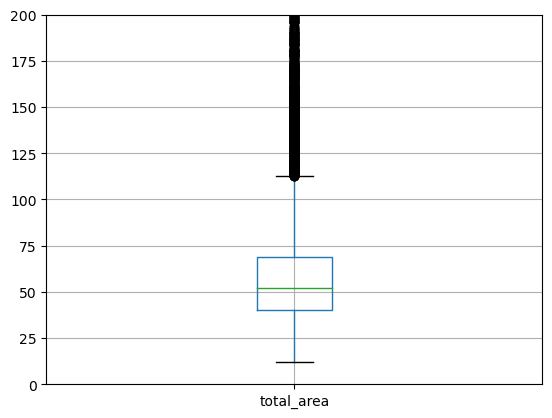

In [57]:
import matplotlib.pyplot as plt # import the matplotlib library
plt.ylim(0,200) #  indicate the range of values
data.boxplot(column = 'total_area') # boxplot for total area

The main emissions are located above 120 square meters. m.

<AxesSubplot:xlabel='locality_name'>

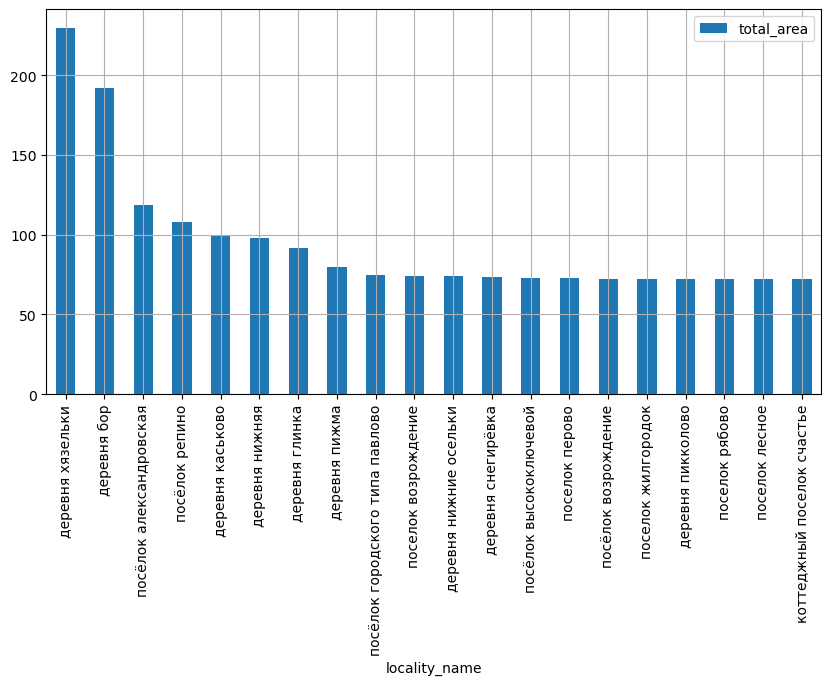

In [58]:
#create a pivot table of the total area by settlement, sort in descending order, 
#build a bar chart for the first 20
data.pivot_table(index='locality_name', values='total_area').sort_values('total_area', ascending=False).head(20).plot(
    kind='bar',
    y='total_area',
    figsize = (10,5),
    grid=True
)

The largest area of real estate is found in villages, which is probably due to the low cost of sq.m.

In [59]:
# living space
data['living_area'].isna().sum()

1847

<AxesSubplot:>

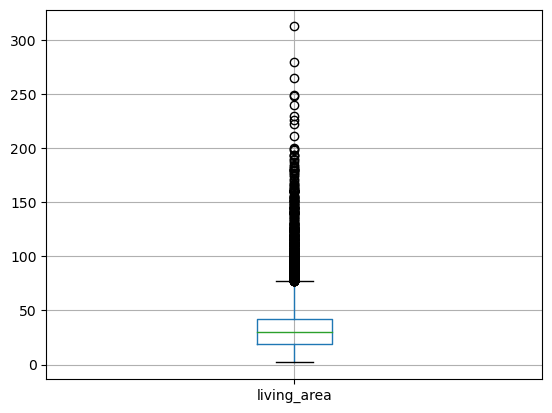

In [60]:
data.boxplot(column = 'living_area') # boxplot for living space

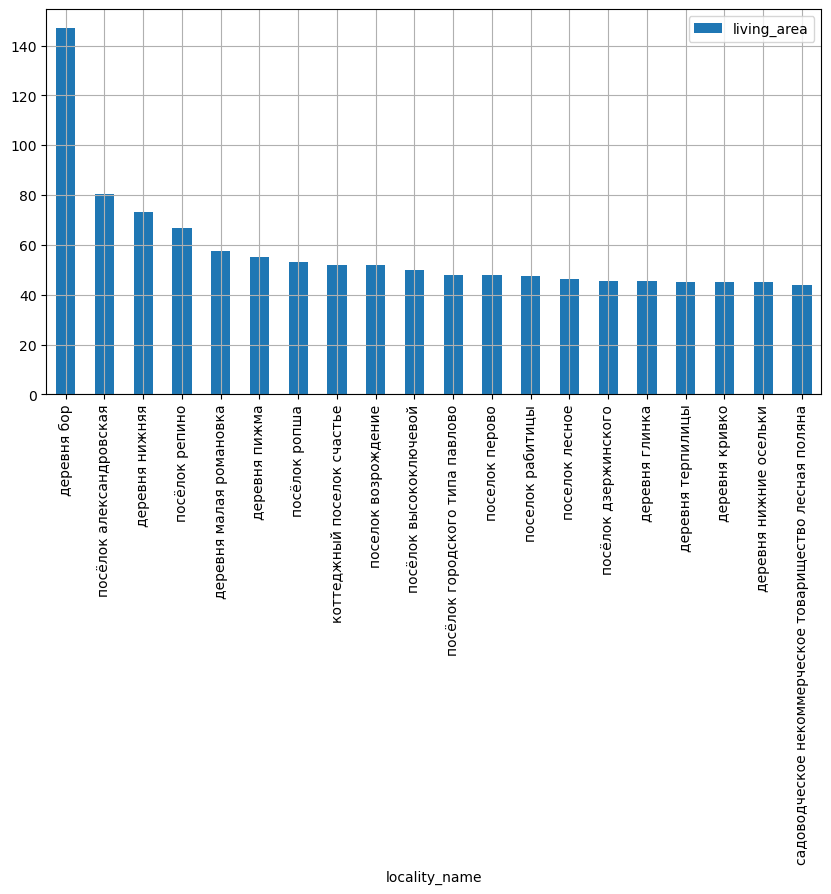

In [61]:
#create a pivot table of the living area by settlement, sort in descending order, 
#build a bar chart for the first 20
data.pivot_table(index='locality_name', values='living_area').sort_values('living_area', ascending=False).head(20).plot(
    kind='bar',
    y='living_area',
    figsize = (10,5),
    grid=True
)

plt.show()

In [62]:
#selected columns with numeric parameters
parametrs = data[['living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type', 
             'floors_total','cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'day_exp', 'month' ]]

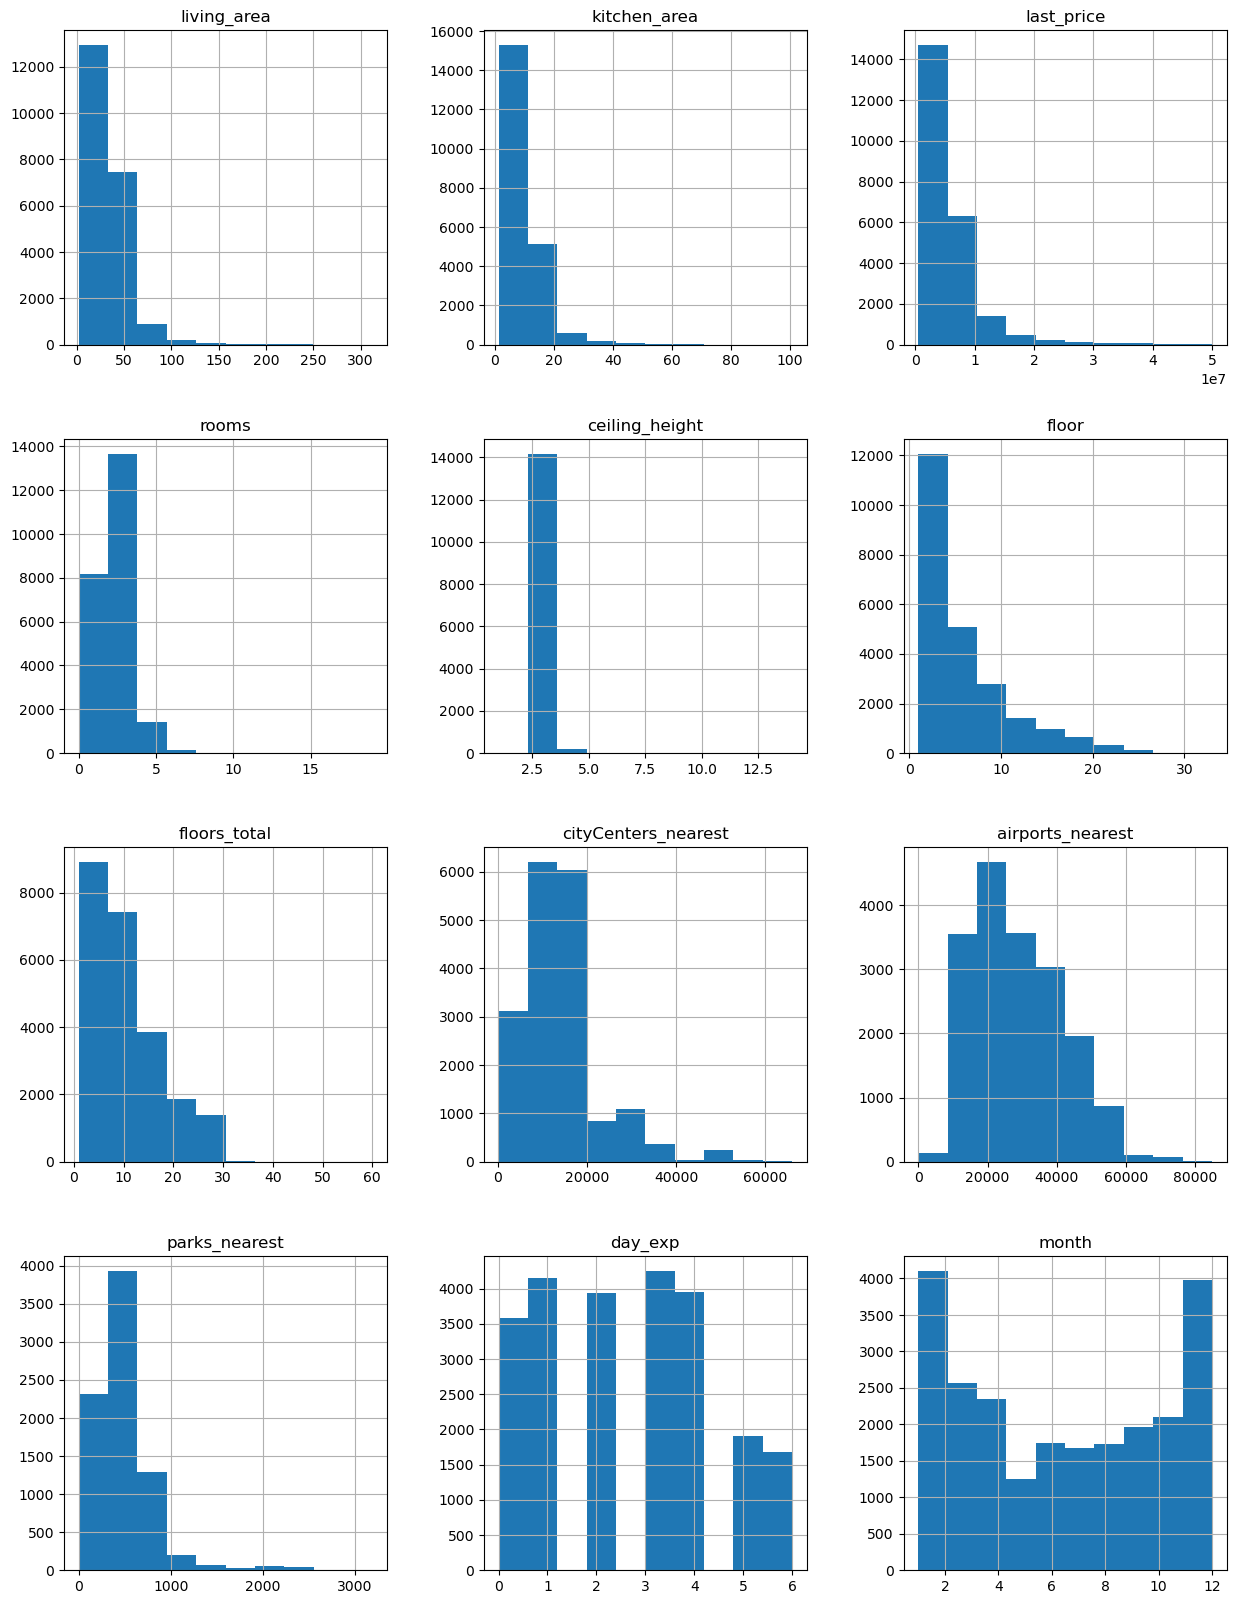

In [63]:
#histograms
parametrs.hist(figsize=(15, 20))
plt.show()

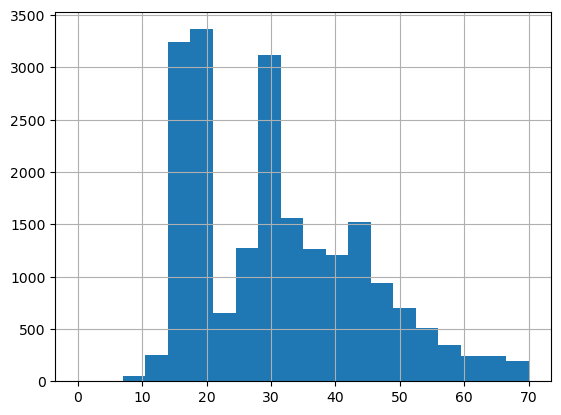

In [64]:
parametrs['living_area'].hist(bins = 20, range = (0,70)) # clarify the parameters for living space
plt.show()

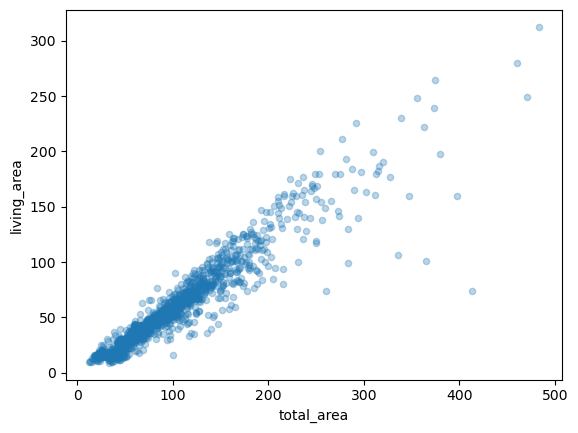

In [65]:
#scatter diagram between living and total areas
data.groupby('total_area').agg({'living_area':'median'}).reset_index().plot(x='total_area', y='living_area', kind='scatter', alpha=0.3)
plt.show()

<div class="alert alert-info"> <b>Comments:</b> The living area is characterized by a normal distribution with peaks at 15-20 sq. m and 30 sq. m. Probably these peaks correspond to the most popular layouts in mass development. The relationship between living and total areas exists for almost the entire range of values.</div>



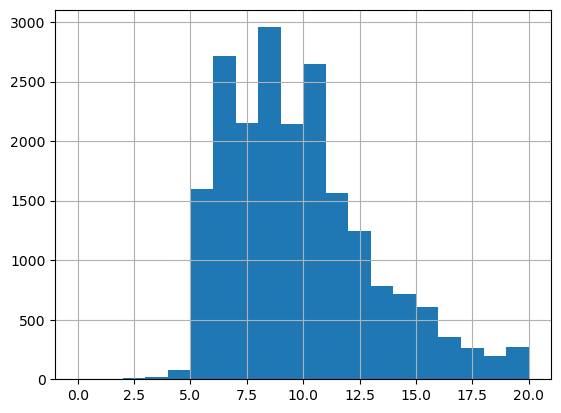

In [66]:
parametrs['kitchen_area'].hist(bins = 20, range = (0,20)) # clarify the parameters for kitchen space 
plt.show()

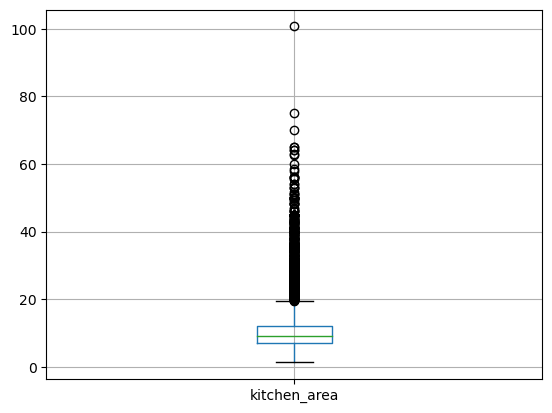

In [67]:
data.boxplot(column = 'kitchen_area') # dropbox for kitchen area
plt.show()

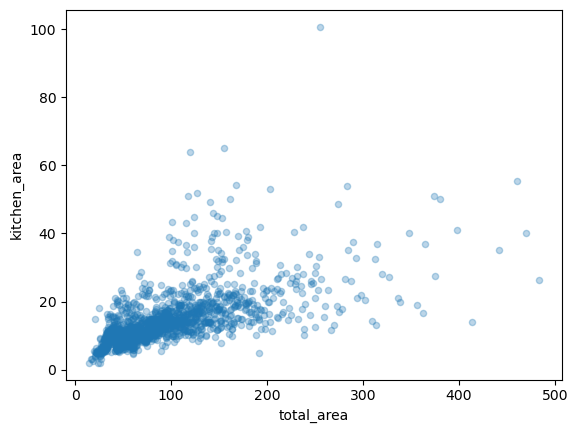

In [68]:
#scatter diagram between kitchen and total areas
data.groupby('total_area').agg({'kitchen_area':'median'}).reset_index().plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.3)
plt.show()

<div class="alert alert-info"> <b>Comments:</b> The distribution of kitchen area is close to normal. We can say that people do not lack kitchen space. The most popular areas are 7, 8 and 12 sq. m.
It is interesting to note the almost complete absence of mutual dependence between the total area and the kitchen area. The exception is real estate with small areas. This fact can be attributed to three reasons.
Firstly, for apartments with a large area, the kitchen becomes less of a “mandatory attribute”.
Secondly, for apartments over 50 sq m, the requirements for kitchen area are similar.
Thirdly, with an area of less than 40 square meters, people begin to save on kitchen space.</div>


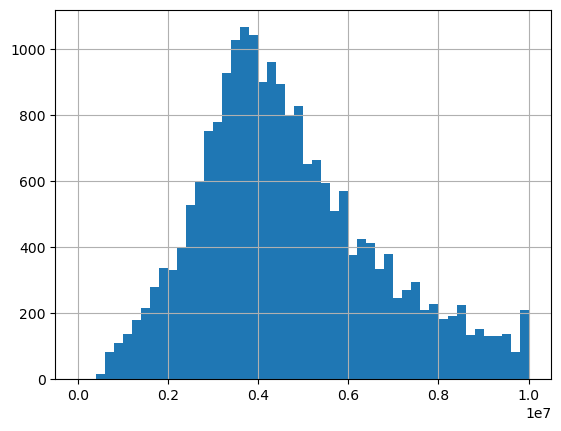

In [69]:
parametrs['last_price'].hist(bins = 50, range = (0,10000000)) # prices histograms
plt.show()

In [70]:
data['last_price'].describe() # statistical characteresation of price

count    2.345700e+04
mean     5.987658e+06
std      4.915213e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.996890e+07
Name: last_price, dtype: float64

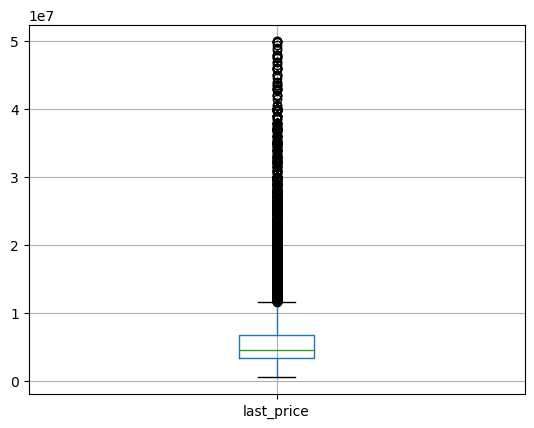

In [71]:
data.boxplot(column = 'last_price') # boxplot for lasr price
plt.show()

<div class="alert alert-info"> <b>Connemt:</b> The distribution of price values is close to normal. The most typical price of real estate is slightly less than 4 million rubles. Prices less than 0.5 million and more than 12 million are rare. At the same time, the cost of real estate can reach 50 million rubles.</div>


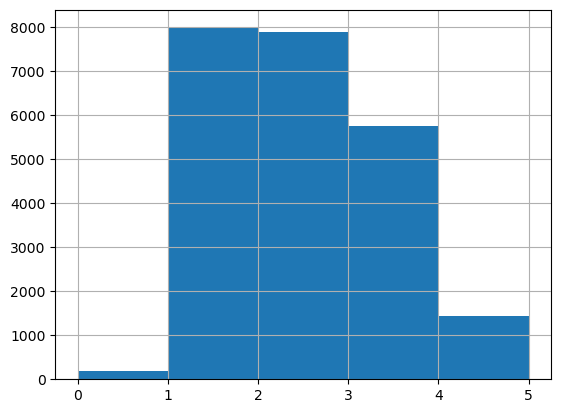

In [72]:
parametrs['rooms'].hist(bins = 5, range = (0, 5)) # histogram of number of flats
plt.show()

In [73]:
# numver of rooms
data['rooms'].describe() #

count    23457.000000
mean         2.056870
std          1.054576
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

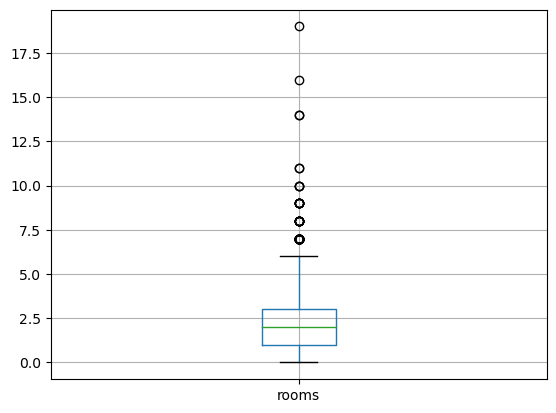

In [74]:
data.boxplot(column = 'rooms') # boxplot for rooms
plt.show()

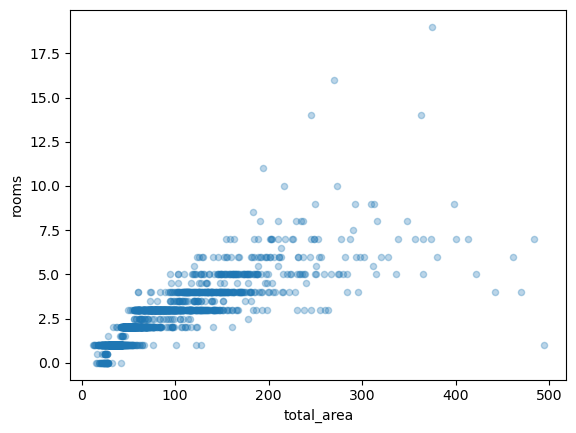

In [75]:
# scatter diagram between total area and number of rooms 
data.groupby('total_area').agg({'rooms':'median'}).reset_index().\
                                                plot(x='total_area', y='rooms', kind='scatter', alpha=0.3)
plt.show()

<div class="alert alert-info"> <b>Comment:</b> The distribution of the number of rooms is described by the Poison distribution. The most popular are one-room apartments. More than 5 rooms are practically rare.
The relationship between the number of rooms and the total area is observed for an apartment up to 50 sq. m. Further, the relationship weakens significantly. It is likely that for apartments larger than 50 square meters the area of the rooms themselves will begin to increase. And according to the number of rooms, “saturation” occurs.</div>


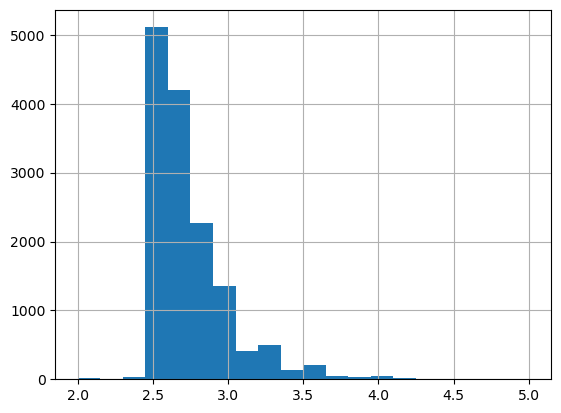

In [76]:
parametrs['ceiling_height'].hist(bins = 20, range = (2, 5)) # histogram of ceiling height
plt.show()

<div class="alert alert-info"> <b>Comment:</b> Ceiling height distribution on Poisson protocols. The most common ceilings are 2.5 m high. Ceiling heights higher than 3 m are very rare.</div>


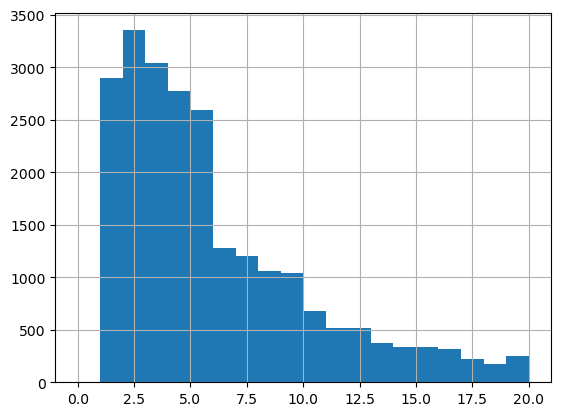

In [77]:
parametrs['floor'].hist(bins = 20, range = (0, 20)) # histogram of floor
plt.show()

<div class="alert alert-info"> <b>Comment:</b> The most popular floors are from 1 to 6. The most popular are floors 2 and 3. Above the 10th floor there is a gradual decline in interest in housing. On the one hand, the psychological mark of 10 plays a role. On the other hand, the influence of the popular staging of buildings is likely.</div>


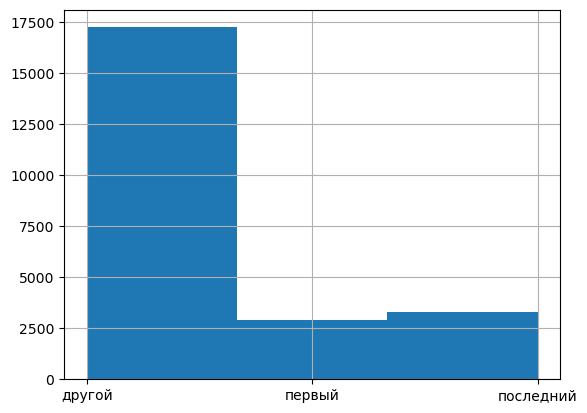

In [78]:
parametrs['floor_type'].hist(bins = 3) # histogram of categories by floor
plt.show()

<div class="alert alert-info"> <b>Comments:</b> The most common real estate advertisements are on middle floors. The extreme floors are close in terms of performance, but people like the upper floors a little more.</div>


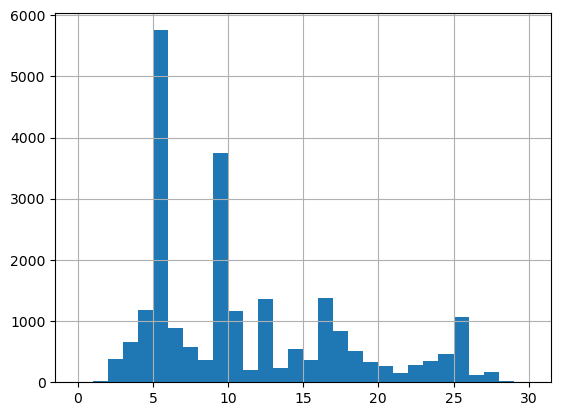

In [79]:
parametrs['floors_total'].hist(bins = 30, range = (0, 30)) # histogram of floor
plt.show()

<div class="alert alert-info"> <b>Comment:</b>As a result of standard construction, the most common are houses with the following floors: 5, 9, 12, 14, 17, 26. The most common are houses with 5 and 9 floors</div>


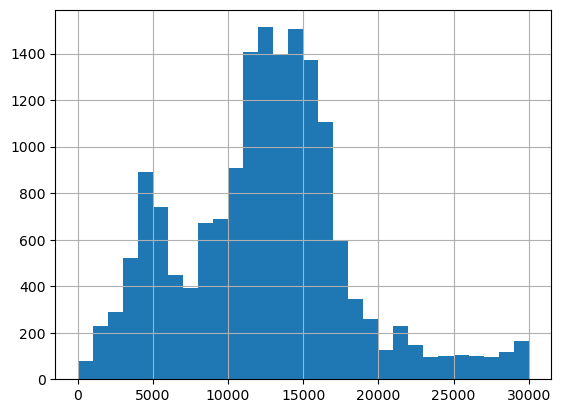

In [80]:
parametrs['cityCenters_nearest'].hist(bins = 30, range = (0, 30000)) # histogram of distance to centre
plt.show()

<div class="alert alert-info"> <b>Comments:</b> People want to live in the center, but they can’t or don’t want to live in the center itself. The most popular sections: 3-6 km and 11-17 km. It can be assumed that the last row is due to residential areas in the suburbs. </div>


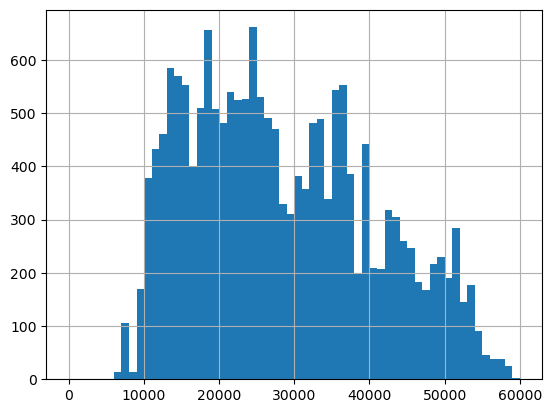

In [81]:
parametrs['airports_nearest'].hist(bins = 60, range = (0, 60000)) # histogram for distance to airport
plt.show()

<div class="alert alert-info"> <b>Comment:</b> The distribution of distances to the airport is very heterogeneous. This is likely due to both the small amount of data and the heterogeneity of the selection. The distance to the airport depends on the size of the city. But there are practically no airports closer than 10 km and further than 55 km.</div>


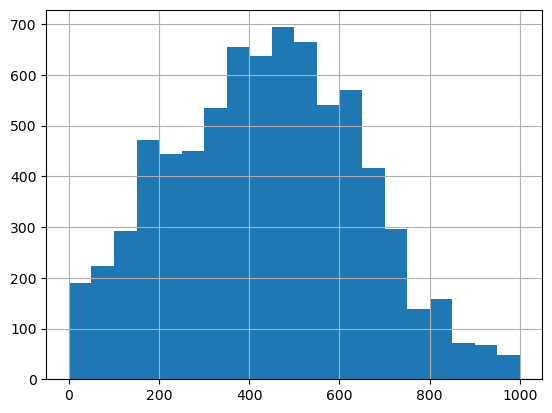

In [82]:
parametrs['parks_nearest'].hist(bins = 20, range = (0, 1000)) # histogram of distance to nearest park
plt.show()

In [83]:
parametrs['parks_nearest'].describe() # statistical characterisation of distance to nearest park

count    7939.000000
mean      491.978587
std       341.388187
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<div class="alert alert-info"> <b>Comments:</b> The distribution of distance to the park is normal. Basically, the park is located at a distance of 200-800 m. This is probably due to the fact that when the distance to the park is more than 800 m, sellers do not consider it necessary to indicate this information.</div>

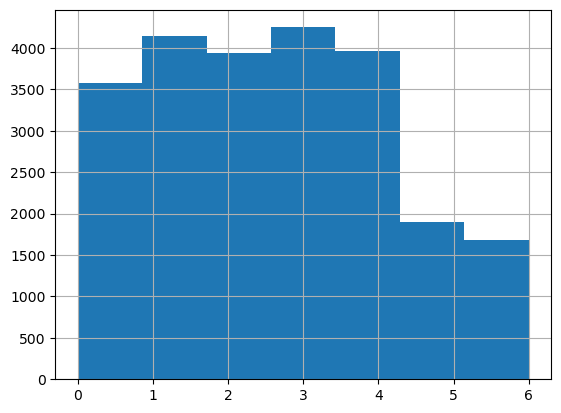

In [84]:
parametrs['day_exp'].hist(bins = 7) # histogram of the day of the week the ad was published
plt.show()

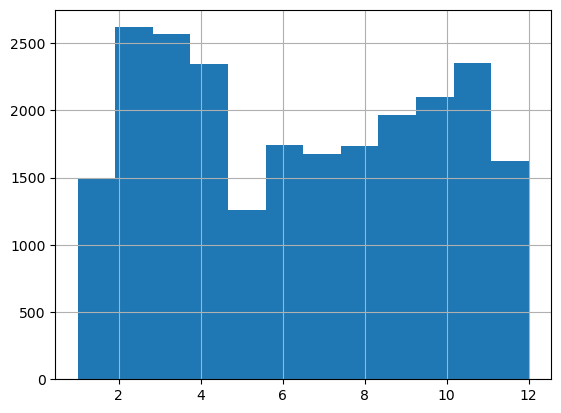

In [85]:
parametrs['month'].hist(bins = 12) # histogram of the month the ad was published
plt.show()

<div class="alert alert-info"> <b>Комментарий:</b> Наиболее часто выкладывают объявления в будни с февраля по апрель и в октябре-ноябре. Спад активности происходит в январе, мае и декабре. В общем Новый год и весна отвлекают людей от текущих забот.</div>

In [86]:
data['days_exposition'].head() # how quickly apartments sold

0      NaN
1     81.0
2    558.0
4    121.0
5     55.0
Name: days_exposition, dtype: float64

<AxesSubplot:>

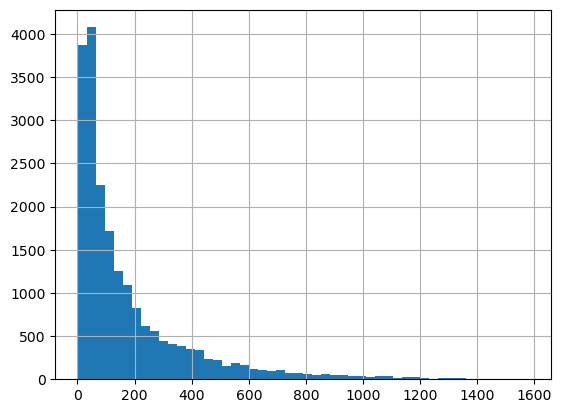

In [87]:
data['days_exposition'].hist(bins=50) # sales duration histogram

<AxesSubplot:>

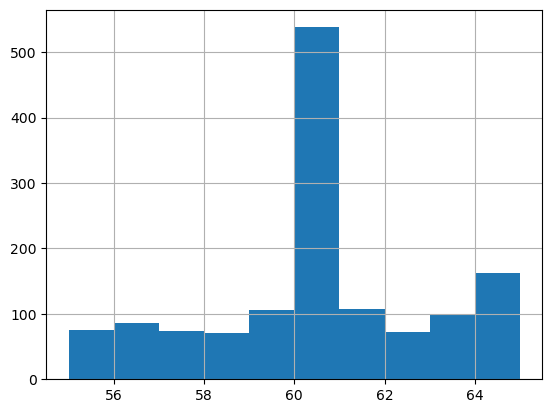

In [88]:
data['days_exposition'].hist(bins=10, range=(55,65)) # consider the peak range

In [89]:
data['days_exposition'].describe() # statistical parameters of sales duration

count    20318.000000
mean       180.133428
std        219.113493
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

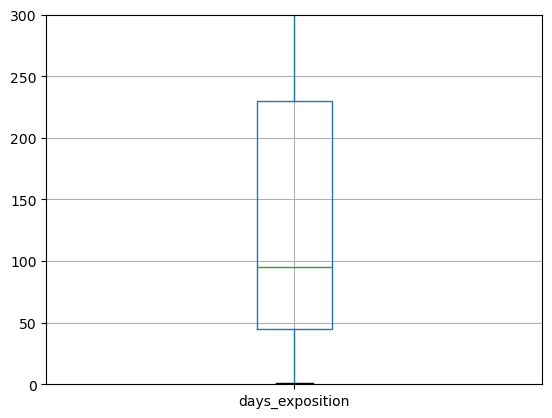

In [90]:
data.boxplot(column = 'days_exposition') # boxplot of sales duration
plt.ylim(0,300)
plt.show()

<div class="alert alert-info"> <b>Ccomments:</b> The distribution of apartment sales periods is more similar to the Poison distribution. But two facts cause concern.
First: after 5 days the number of sales increases abruptly to a maximum. This is only possible in case of rush demand.
Second: the release at 46 and 60 days is 5 times higher than the normal level.
According to the range diagram and statistical parameters, sales faster than 50 days are unusually fast. And more than 230 days are already long. The typical period required for the sale of real estate is 100 days. Again, 100 days or 3 months is very similar to the psychological mark.</div>



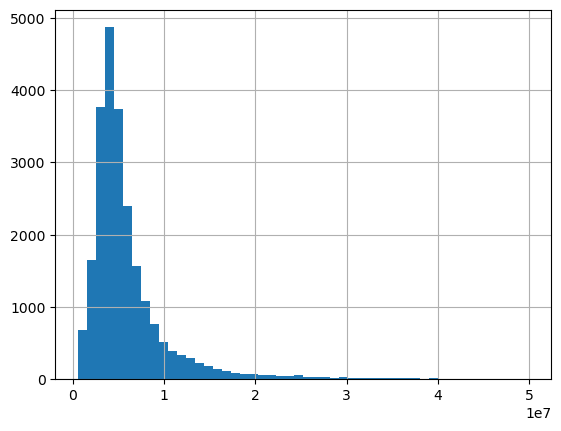

In [91]:
# Search for factors that most influence the total (full) cost of the object.
data['last_price'].hist(bins=50) # re-building the histogram to make it easier to compare with new data
plt.show()

In [92]:
data['last_price'].describe() #we re-display the description as a whole for ease of comparison

count    2.345700e+04
mean     5.987658e+06
std      4.915213e+06
min      5.200000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.996890e+07
Name: last_price, dtype: float64

In [93]:
# pivot table of total area and last prise
data.pivot_table(index='total_area', values='last_price').sort_values(by='last_price', ascending=False).head(20)

,last_price
total_area,
398.00,49968900.0
483.90,49950000.0
172.70,49900000.0
203.30,48000000.0
147.20,47700000.0
260.00,46000000.0
223.00,45900000.0
413.50,45000000.0
184.70,44000000.0


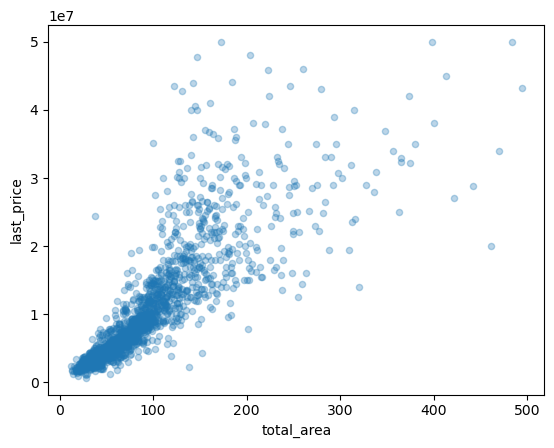

In [94]:
# scatter plot of total area and median last prisce
total_price = data.groupby('total_area').agg({'last_price':'median'}).reset_index()
total_price.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

In [95]:
# correlation between total price and last price 
total_price['total_area'].corr(total_price['last_price']).round(3)

0.849

<div class="alert alert-info"> <b>Coment:</b> The correlation is quite high - 0.85. Quite a strong addiction.

The distribution shows that as the area increases, the cost increases. This dependence is most confidently observed for an area of up to 100 square meters. m., i.e. for the majority of the sample. A high scatter with an increase in area of more than 200 sq. m indicates both a small sample and an increase in the influence of various factors. For example, in a village, two houses with an area of 200 square meters may differ in price due to the quality of finishing, elite status of the village, etc...</div>


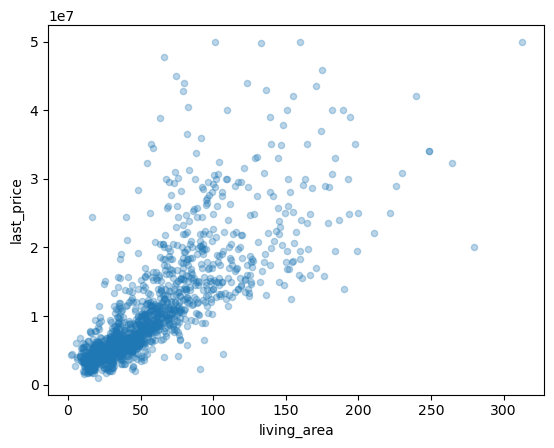

In [96]:
# group median last price on living area
living_price = data.groupby('living_area').agg({'last_price':'median'}).reset_index()
# scatter plot
living_price.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

In [97]:
# correlation between last price and living area
living_price['living_area'].corr(living_price['last_price']).round(3)

0.801

<div class="alert alert-info"> <b>Comment:</b> Correlation 0.80. Weaker than for the total area, but still serious.

The relationship between price and living space is almost the same as with total area, but less strict. </div>


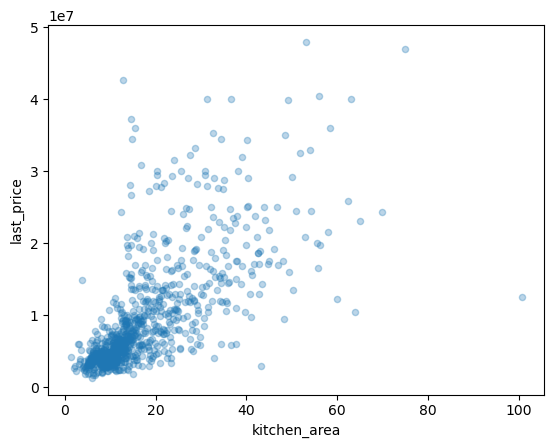

In [98]:
# group median last price on kitchen area
kitchen_price = data.groupby('kitchen_area').agg({'last_price':'median'}).reset_index()
# scatter plot 
kitchen_price.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)
plt.show()

In [99]:
# correlation between last price and kitchen area
kitchen_price['kitchen_area'].corr(kitchen_price['last_price']).round(2)

0.7

<div class="alert alert-info"> <b>Comment:</b> Correlation is 0.7, the kitchen influences the price less, but is still important.

The relationship between price and kitchen area is also positive, but much less strict.

In other words, people love territory. But first of all, the common territory is important to them. </div>

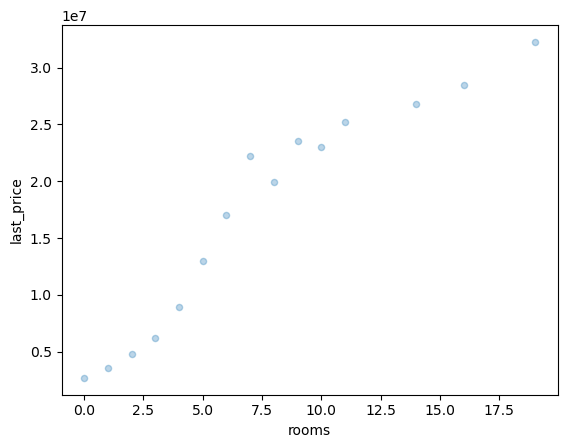

In [100]:
# group median last price on number rooms
rooms_price = data.groupby('rooms').agg({'last_price':'median'}).reset_index()
# scatter plot
rooms_price.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)
plt.show()

In [101]:
# correlation between last price and number of rooms
rooms_price['rooms'].corr(rooms_price['last_price']).round(2)

0.95

<div class="alert alert-info"> <b>Comment:</b> Fair correlation 0.95. After all, people live not in the square or in the kitchen, but in rooms. This is the most pronounced dependence.

The price increases with the number of rooms. The fastest price increases occur with an increase in the number of rooms from 3 to 7.  </div>

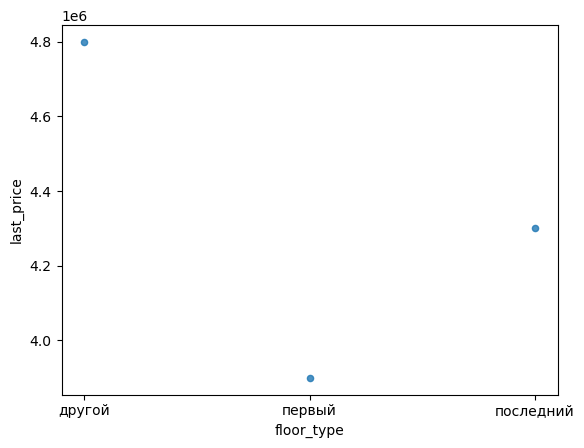

In [102]:
# group median last price on type of floor
floor_type = data.groupby('floor_type').agg({'last_price':'median'}).reset_index()
#scatter plot
floor_type.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.8)
plt.show()

<div class="alert alert-info"> <b>Comments:</b> The floors in the center of the building are valued the most. So the middle floors are on average 10% more expensive than the top floor. And the top floor is 10% more expensive than the first.  </div>


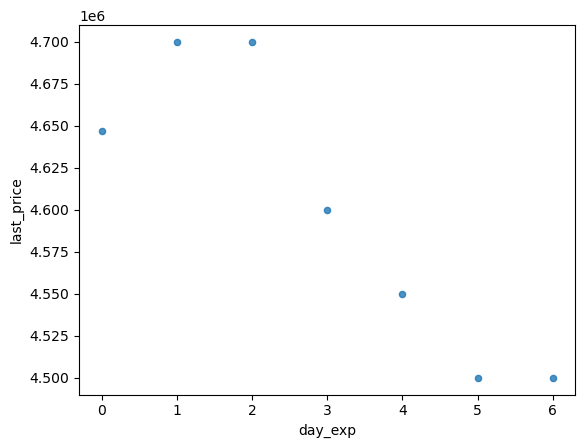

In [103]:
# group median last price on sales duration
day_price = data.groupby('day_exp').agg({'last_price':'median'}).reset_index()
# scatter plot
day_price.plot(x='day_exp', y='last_price', kind='scatter', alpha=0.8)
plt.show()

In [104]:
#correlation between last price and salea duration
day_price['day_exp'].corr(day_price['last_price']).round(2)

-0.89

<div class="alert alert-info"> <b>COmments:</b> A negative correlation of 0.89 suggests that the longer we wait during the week, the less we will get for the apartment.


It is most preferable to post announcements on Tuesday. The least successful days are weekends. </div>


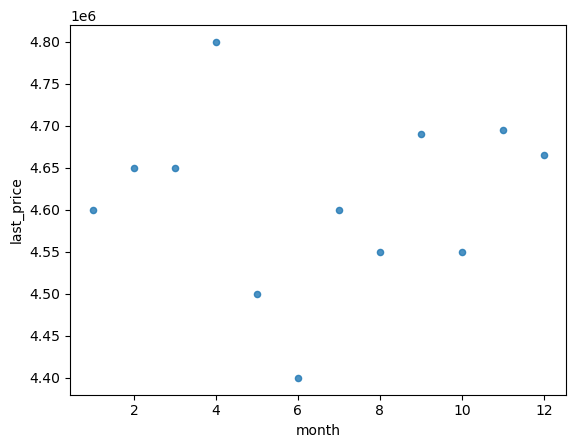

In [105]:
# group median last price on month
month_price = data.groupby('month').agg({'last_price':'median'}).reset_index()
# scatter plot
month_price.plot(x='month', y='last_price', kind='scatter', alpha=0.8)
plt.show()

In [106]:
# correlation between last price and month
month_price['month'].corr(month_price['last_price']).round(2)

0.03

<div class="alert alert-info"> <b>Comment:</b> The correlation is near zero. No matter what month they start selling, the price will be the same.

There is practically no pronounced dependence of the price on the month of the start of sales. But the most successful month is April. The least successful month is June.
Apparently the spring mood encourages people to take more decisive actions. And at the beginning of summer, everyone wants to go on vacation.</div>

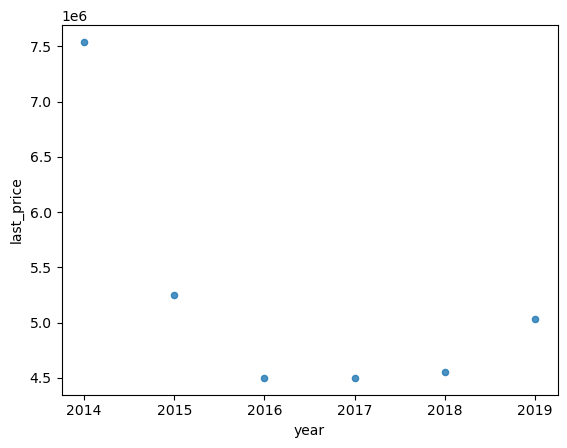

In [107]:
# group median last price on year and plor scatter diagram

data.groupby('year').agg({'last_price':'median'}).reset_index().plot(x='year', y='last_price', kind='scatter', alpha=0.8)
plt.show()

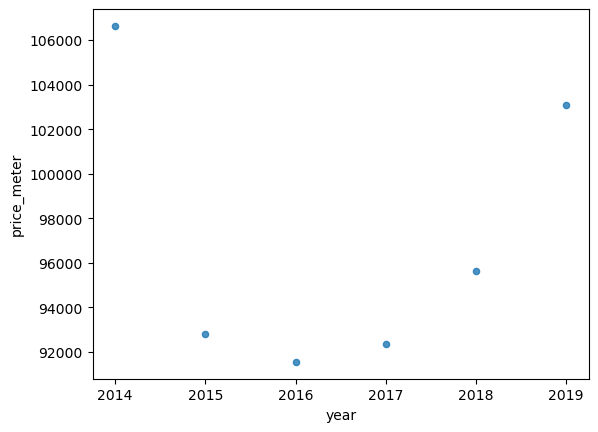

In [108]:
#dependence of price of sq.m. of year
data.groupby('year').agg({'price_meter':'median'}).reset_index().plot(x='year', y='price_meter', kind='scatter', alpha=0.8)
plt.show()

<div class="alert alert-info"> <b>Comment:</b> In 14, the real estate market was twice as active as in 16 and 17. After 17, there was a slight increase in activity.
In order not to depend on the area of the apartment, we looked at the dependence of the cost per square meter on the year. The general appearance of the graph remains approximately the same. But the range of price variations has decreased. The price per square meter decreased by about 10%. This is probably due to the fact that construction costs have remained the same. As a result, people saved mainly on space. It is important to note that the cost per square meter has almost recovered.</div>

In [109]:
# table for settlements and the corresponding number of advertisements and price per square meter
# top-10
top_ad_price = data.groupby('locality_name').agg({'balcony':'count', 'price_meter':'median'}) \
    .sort_values(by = 'balcony', ascending = False).rename(columns={'balcony':'ad_number'}). \
    reset_index().head(10) 

top_ad_price

,locality_name,ad_number,price_meter
0,санкт-петербург,15512,104532.008181
1,посёлок мурино,520,85878.462169
2,посёлок шушары,439,76829.268293
3,всеволожск,398,65789.473684
4,пушкин,369,100000.000000
5,колпино,338,74723.748474
6,посёлок парголово,327,91642.857143
7,гатчина,307,67796.610169
8,деревня кудрово,299,91860.465116
9,выборг,237,58158.319871


In [110]:
# average price per square meter for the most active settlements
round(top_ad_price['price_meter'].mean(),2)

81721.12

<div class="alert alert-info"> <b>Comment:</b> Among the settlements with the largest number of advertisements, St. Petersburg takes first place. Vyborg takes 10th place in the TOP-10.

In St. Petersburg, the typical price per square meter is 104,532.01 rubles.

  In Vyborg - 58158.32 rubles.
The average price for the TOP 10 districts was RUB 81,721.81</div>


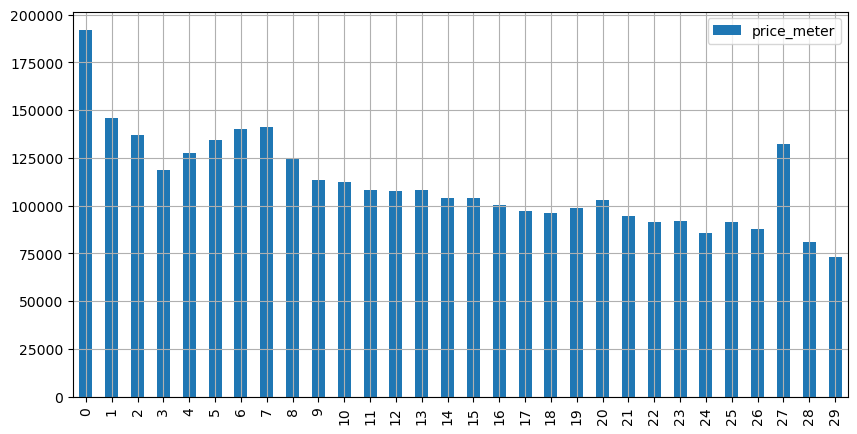

In [111]:
# Average price for each kilometer in St. Peterburg
Piter_price_meter = data.query('locality_name == "санкт-петербург"') # query on St. Peterburg
Piter_price_meter = Piter_price_meter.dropna(subset=['cityCenters_nearest_km']) # drop gaps in distance

# pivot table of distnce and sq.m. price 
Piter_price_meter.pivot_table(index='cityCenters_nearest_km', values='price_meter').reset_index().plot(
    kind='bar', # указываетсятип столбчатая диаграма
    y='price_meter', # указывается значение оси ординат
    figsize = (10,5), # указывается размер рисунка
    grid=True # рисуем координатную сетку
)
plt.show()

<div class="alert alert-info"> <b>Comment:</b> In general, there is a pronounced decrease in prices with distance from the center of St. Petersburg. So in the center a square meter is valued at almost 160 thousand rubles, and at a distance of 29 km - 60 thousand rubles. So, at a distance of less than 30 km, the cost decreased by 2.5 times.

At the same time, there is a peak in the cost per square meter in the area of 4-7 km. There is also a local price increase of 27 km. This is probably due to more elite areas. </div>

### General conclusion

<div class="alert alert-info"> <b> The key factor influencing the cost of most properties is the number of rooms. But when the apartment area is more than 70 square meters, the number of rooms and the kitchen area begin to have less weight.
    
The determining factors for real estate prices are their location, distance to the center and total area. Traditionally, apartments on the middle floors are priced higher.
    
At the same time, apartments up to the 5th floor are sold significantly more often, which is most likely due to the fact that most houses in the city are higher than or equal to 5 floors.
    
The vast majority of real estate is valued at RUB 3.5 million. up to 7 million rubles The most common price is 4.5 million rubles.

The typical area of the property is in the range of 30-70 sq. m. The most common is 50 sq. m.
Large real estate areas are preferred in villages and towns.

The rate of sale follows a Poison distribution. This is probably due to the high demand for real estate. In other words, most apartments sell fairly quickly. At the same time, the likelihood of selling at a higher price is higher if you post ads on Tuesday or Wednesday.
    
The typical period required for sale is 100 days. In most cases, it takes from 50 to 220 days to sell apartments

In points remote from the center, the distance to the center or airport is often not indicated. Information about parks and reservoirs is also not provided. This is probably due to the lack of parks in residential areas and the presence in villages.

Between 2014 and 2019, prices were highest in 2014. There was a certain recovery in 2018-2019.
    
This should be taken into account. that the reduction is mainly due to a reduction in purchased area. The cost per square meter decreased by only 10%. And by 2019, the price per square meter had practically recovered. In general, the developers again managed to shift the problems onto the end buyer.